In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [6]:
car = pd.read_csv("D:/11 semester/ML/FINAL/Auto Sales data.csv")
car.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [9]:
#creating dictionary for every categorial column
orderdate_dic= dict()
status_dic=dict()
productline_dic=dict()
productcode_dic=dict()
customername_dic=dict()
phone_dic=dict()
addressline1_dic=dict()
city_dic=dict()
postalcode_dic=dict()
country_dic=dict()
contactlastname_dic=dict()
contactfirstname_dic=dict()
dealsize_dic=dict()


In [11]:
#creating encoding column for categorial columns only
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car['orderdate_enc']=le.fit_transform(car['ORDERDATE'])
for num, lbl in enumerate(le.classes_):
   orderdate_dic[lbl]=num
print('ORDERDATE label saved')
car['status_enc']=le.fit_transform(car['STATUS'])
for num, lbl in enumerate(le.classes_):
   status_dic[lbl]=num
print('STATUS label saved')
car['productline_enc']=le.fit_transform(car['PRODUCTLINE'])
for num, lbl in enumerate(le.classes_):
   productline_dic[lbl]=num
print('PRODUCTLINE label saved')
car['productcode_enc']=le.fit_transform(car['PRODUCTCODE'])
for num, lbl in enumerate(le.classes_):
   productcode_dic[lbl]=num
print('PRODUCTCODE label saved')
car['customername_enc']=le.fit_transform(car['CUSTOMERNAME'])
for num, lbl in enumerate(le.classes_):
   customername_dic[lbl]=num
print('CUSTOMERNAME label saved')
car['phone_enc']=le.fit_transform(car['PHONE'])
for num, lbl in enumerate(le.classes_):
   phone_dic[lbl]=num
print('PHONE label saved')
car['addressline1_enc']=le.fit_transform(car['ADDRESSLINE1'])
for num, lbl in enumerate(le.classes_):
   addressline1_dic[lbl]=num
print('ADDRESSLINE1 label saved')
car['city_enc']=le.fit_transform(car['CITY'])
for num, lbl in enumerate(le.classes_):
   city_dic[lbl]=num
print('CITY label saved')
car['postalcode_enc']=le.fit_transform(car['POSTALCODE'])
for num, lbl in enumerate(le.classes_):
   postalcode_dic[lbl]=num
print('POSTALCODE label saved')
car['country_enc']=le.fit_transform(car['COUNTRY'])
for num, lbl in enumerate(le.classes_):
   country_dic[lbl]=num
print('COUNTRY label saved')
car['contactlastname_enc']=le.fit_transform(car['CONTACTLASTNAME'])
for num, lbl in enumerate(le.classes_):
   contactlastname_dic[lbl]=num
print('CONTACTLASTNAME label saved')
car['contactfirstname_enc']=le.fit_transform(car['CONTACTFIRSTNAME'])
for num, lbl in enumerate(le.classes_):
   contactfirstname_dic[lbl]=num
print('CONTACTFIRSTNAME label saved')
car['dealsize_enc']=le.fit_transform(car['DEALSIZE'])
for num, lbl in enumerate(le.classes_):
   dealsize_dic[lbl]=num
print('DEALSIZE label saved')
car_2=car.drop(['ORDERDATE','STATUS','PRODUCTLINE','PRODUCTCODE','CUSTOMERNAME','PHONE','ADDRESSLINE1','CITY','POSTALCODE','COUNTRY','CONTACTLASTNAME','CONTACTFIRSTNAME','DEALSIZE'],axis=1)
car_2.head()

ORDERDATE label saved
STATUS label saved
PRODUCTLINE label saved
PRODUCTCODE label saved
CUSTOMERNAME label saved
PHONE label saved
ADDRESSLINE1 label saved
CITY label saved
POSTALCODE label saved
COUNTRY label saved
CONTACTLASTNAME label saved
CONTACTFIRSTNAME label saved
DEALSIZE label saved


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP,orderdate_enc,status_enc,productline_enc,productcode_enc,customername_enc,phone_enc,addressline1_enc,city_enc,postalcode_enc,country_enc,contactlastname_enc,contactfirstname_enc,dealsize_enc
0,10107,30,95.70,2,2871.00,828,95,202,5,1,0,44,48,54,41,0,18,75,36,2
1,10121,34,81.35,5,2765.90,757,95,67,5,1,0,63,53,39,55,27,6,27,54,2
2,10134,41,94.74,2,3884.34,703,95,5,5,1,0,45,16,21,51,41,6,16,11,1
3,10145,45,83.26,6,3746.70,649,95,207,5,1,0,82,75,51,52,49,18,74,31,1
4,10168,36,96.66,1,3479.76,586,95,229,5,1,0,76,76,55,12,54,18,29,32,1


In [13]:
X=car_2.drop('SALES',axis=1)
y=car_2['SALES']
X.shape, y.shape

((2747, 19), (2747,))

In [15]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=32)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2197, 19), (2197,), (550, 19), (550,))

In [17]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
#creating instance of rfr
rf_1= RandomForestRegressor()
#checking the hyperparameter of randomforest
rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
#checking performance
y_pred_train=rf_1.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE on training data {}'.format(rmse_train))

RMSE on training data 66.89086186046977


In [23]:
#error on testing data
y_pred_test=rf_1.predict(X_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE on testing data {}'.format(rmse_test))

RMSE on testing data 281.68871946254785


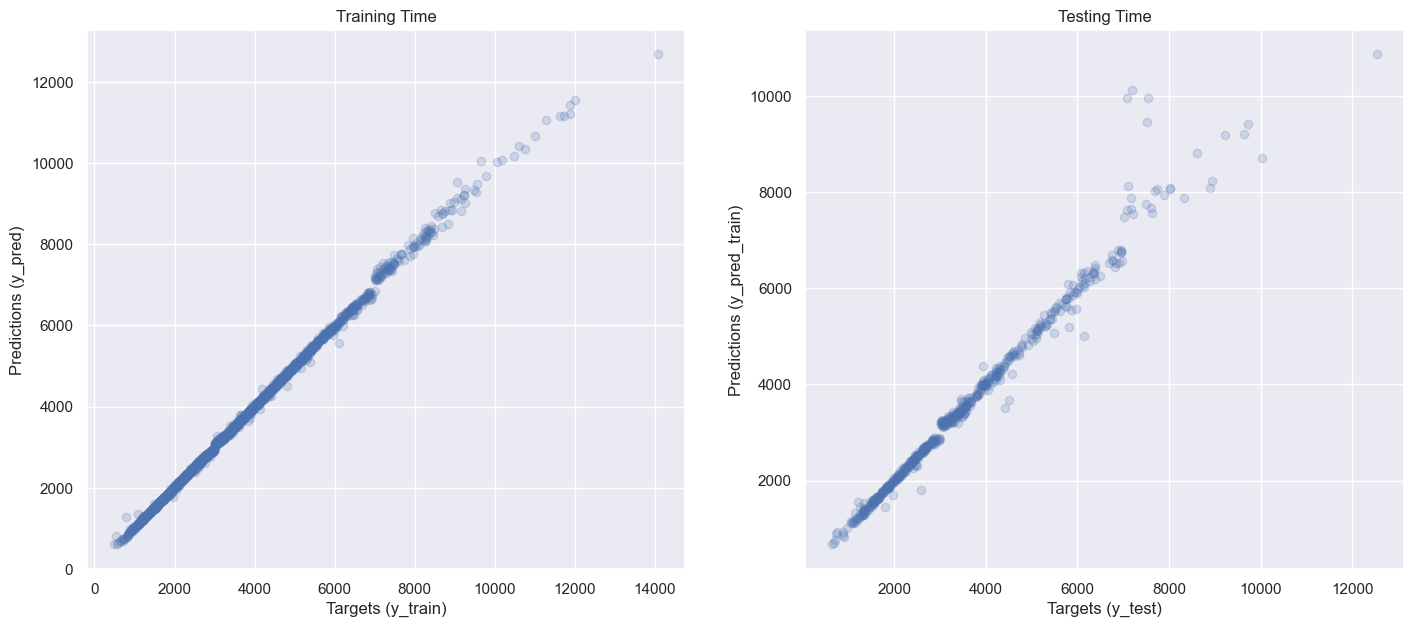

In [24]:
#plotting
plt.figure(figsize=(17,7))
y_pred_train=rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train,alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Training Time');
y_pred_test=rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');
